In [1]:
%config IPCompleter.greedy=True

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nlppreprocess import NLP as npl
from nltk.corpus import stopwords
import nltk
from collections import Counter

In [ ]:
nltk.download('stopwords')

In [3]:
df = pd.read_csv("train.csv")
df.drop(columns='id', inplace=True)

In [4]:
df.size

30452

In [5]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [6]:
df.dtypes

keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
len(df)

7613

In [8]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [9]:
df.keyword.value_counts(sort=False)

fire%20truck       33
army               34
thunderstorm       33
desolation         36
epicentre          12
                   ..
ruin               37
collapse           34
mass%20murderer    32
evacuate           40
fatal              38
Name: keyword, Length: 221, dtype: int64

In [10]:
df.location.value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Ecuador                         1
 Neverland                      1
ALWAYS DYING NEVER RESTING      1
Croydon                         1
Ikeja, Nigeria                  1
Name: location, Length: 3341, dtype: int64

In [11]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
df['long']= df['text'].apply(lambda x: len(x))
long_max = df['long'].max()
long_max

157

In [13]:
long_min = df['long'].min()
long_min

7

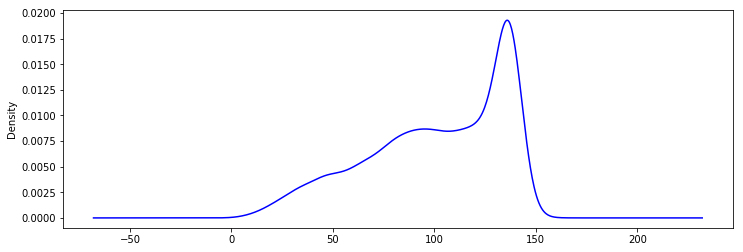

In [14]:
fig = plt.figure(figsize=(12,4))
df.long.plot.kde(color = 'Blue')
plt.show()

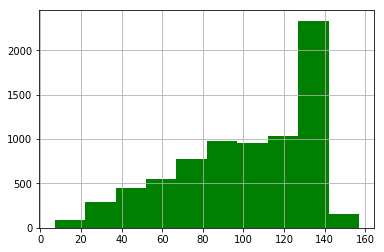

In [15]:
df.long.hist(color='green', bins=10)

In [16]:
long_mean = df['long'].mean()
long_mean

101.03743596479706

In [17]:
df.tail()

,keyword,location,text,target,long
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,NaN,NaN,Police investigating after an e-bike collided ...,1,137
7612,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,94


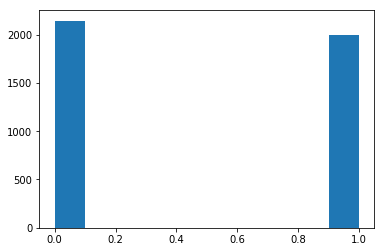

In [18]:
larger_than_mean = df[df['long'] > long_mean]
#larger_than_mean.groupby('target').plot.bar(x='target')
#larger_than_mean.plot.bar(x='target', y=sum(larger_than_mean.groupby('target')))
#plt.bar(larger_than_mean.target, larger_than_mean.target.count())
plt.hist(larger_than_mean.target)
plt.show()

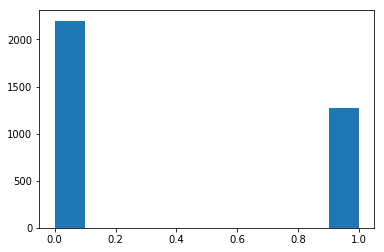

In [19]:
smaller_than_mean = df[df.long < long_mean]
plt.hist(smaller_than_mean.target)
plt.show()

In [20]:
#Busco si los que tienen localizacion tienen mas posibilidad de ser reales

with_loc = df[df.location.notna()]
with_loc.head()

,keyword,location,text,target,long
31,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67
33,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34
35,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


In [21]:
len(with_loc)

5080

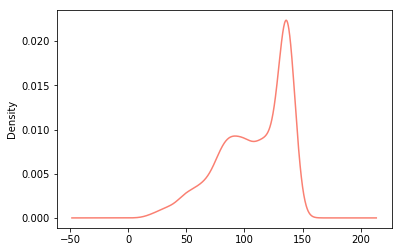

In [22]:
with_loc_real = with_loc[with_loc.target == 1]
with_loc_real.long.plot.kde(color='salmon')

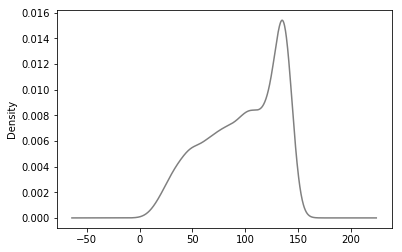

In [23]:
with_loc_false = with_loc[with_loc.target == 0]
with_loc_false.long.plot.kde(color='grey')

In [24]:
len(df.location.isna())

7613

In [25]:
no_loc = df[df.location.isna()]
no_loc.target.value_counts()

0    1458
1    1075
Name: target, dtype: int64

In [126]:
no_loc.tail(50)

,keyword,location,text,target,long
7530,wreckage,NaN,Wreckage is MH370: Najib\nhttp://t.co/iidKC0jS...,1,84
7535,wreckage,NaN,Wreckage 'conclusively confirmed' as from MH37...,1,109
7538,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1,136
7546,wrecked,NaN,good luck to everyone who has school soon but ...,0,93
7549,wrecked,NaN,Cramer: IgerÛªs 3 words that wrecked DisneyÛ...,0,87
7550,wrecked,NaN,Poor Liv and I getting our phones wrecked on t...,0,97
7551,wrecked,NaN,On the freeway to Africa til I wrecked my Audi,0,46
7553,wrecked,NaN,#news Cramer: Iger's 3 words that wrecked Disn...,0,94
7554,wrecked,NaN,James Kunstler: How bad architecture wrecked c...,0,118
7557,wrecked,NaN,You wrecked me. Never felt so low in my life. ...,0,70


In [27]:
def suma_target(grouped_k):
    grouped_k['target_suma']= grouped_k['target'].sum()
    return grouped_k

In [28]:
suma=0
#grouped_k['suma'] = df.groupby(['keyword', 'target']).apply(lambda x: suma + x for x in df['target'] if x== 1)
grouped_k= df.groupby(['keyword']).agg({'target':['sum','count']} ).reset_index()
#grouped_k['sum_target'] = grouped_k['target'].apply('sum')
#grouped_k['suma']= grouped_k.apply(lambda x: (suma + x) for x in grouped_k['target'] if (x== 1))
#grouped_k=df.groupby('keyword')#.apply(suma_target)
#grouped_kl['suma']=grouped_kl.target.apply(sum)
level0= grouped_k.columns.get_level_values(0)
level1= grouped_k.columns.get_level_values(1)
grouped_k.columns = level0 + '_' + level1
grouped_k.insert(loc=2, column='cant_falsas', value=(grouped_k.target_count - grouped_k.target_sum))
#col_rename{'target_sum' : 'cant_reales', 'keyword_':'keyword'})
grouped_k.rename(columns={'target_sum' : 'cant_reales', 'keyword_':'keyword'}, inplace=True)
grouped_k

,keyword,cant_reales,cant_falsas,target_count
0,ablaze,13,23,36
1,accident,24,11,35
2,aftershock,0,34,34
3,airplane%20accident,30,5,35
4,ambulance,20,18,38
...,...,...,...,...
216,wounded,26,11,37
217,wounds,10,23,33
218,wreck,7,30,37
219,wreckage,39,0,39


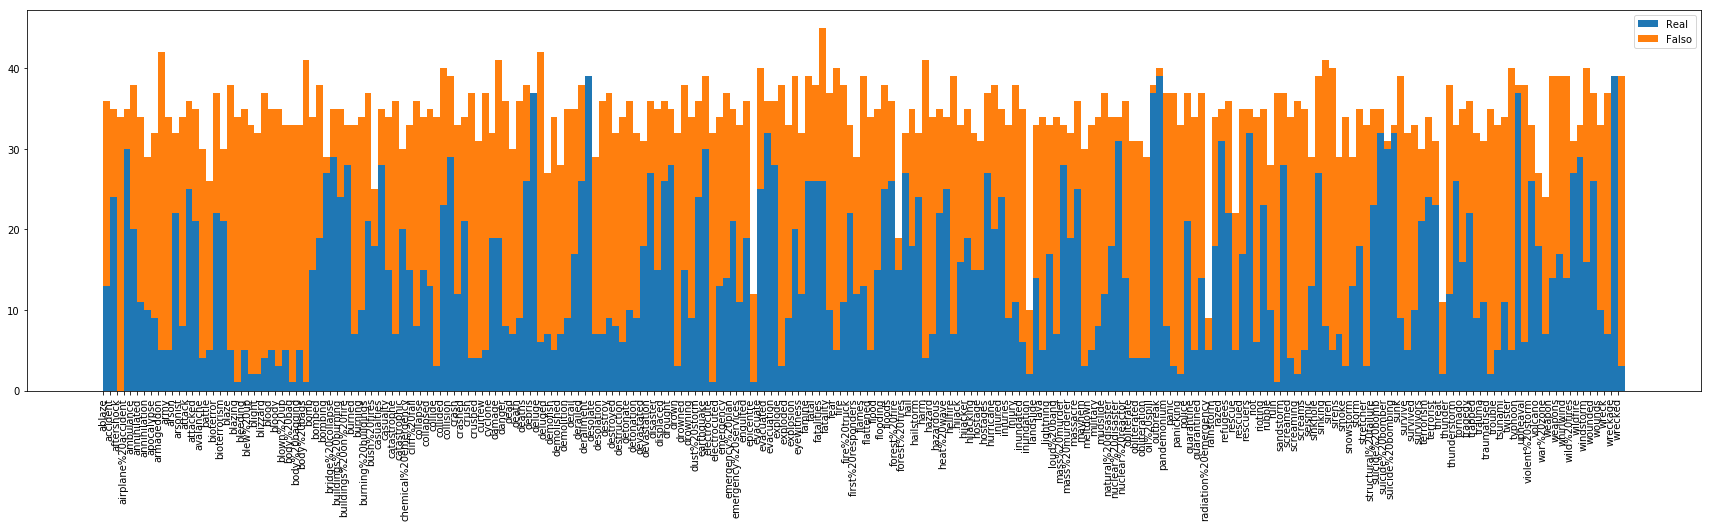

In [29]:
fig = plt.figure(figsize=(30,7))
ax = plt.subplot()
ax.bar(grouped_k.keyword, grouped_k.cant_reales, width = 1, label='Real', align = 'edge')
ax.bar(grouped_k.keyword, grouped_k.cant_falsas, width = 1, bottom=grouped_k.cant_reales, label='Falso', align = 'edge')
plt.xticks(rotation=90)

ax.legend()
plt.show()

In [43]:
stop = stopwords.words('english')

In [30]:
def cuenta_iguales(lista):
    newlist=[]
    for palabra in lista:
        if (lista.count(palabra) > 1):
            newlist.append(lista.count(palabra))
    return newlist

In [55]:
def cuenta_iguales(lista):
    c= Counter(lista)
    count=0
    for key in c:
        if (c[key]>1):
            count+=1
    return count

In [56]:
df['equal_words'] = df.text.agg(lambda x: cuenta_iguales([word for word in x.split() if word not in stop]))


In [57]:
df.head()

,keyword,location,text,target,long,equal_words,Etiqueta
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,0
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,0
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,0


In [58]:
word_count = df.groupby(['equal_words'])['target'].agg({'sum','count'} ).reset_index()

In [59]:
word_count.head(30)

,equal_words,sum,count
0,0,2810,6465
1,1,353,905
2,2,76,182
3,3,16,37
4,4,11,15
5,5,3,5
6,6,0,1
7,8,1,2
8,9,1,1


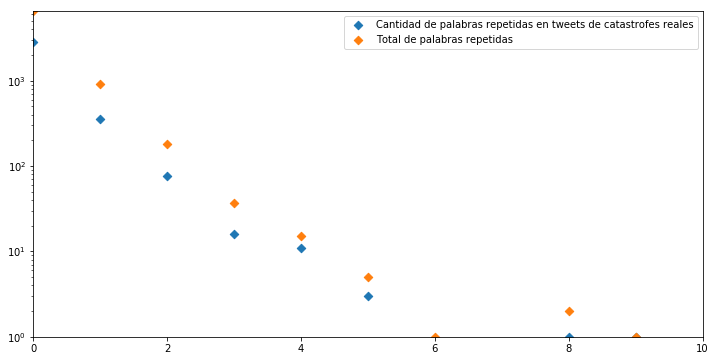

In [102]:
fig,ax = plt.subplots(figsize=(12,6))
cambio = lambda x: 'Total de palabras repetidas' if (x=='count') else 'Cantidad de palabras repetidas en tweets de catastrofes reales'
for name in ['sum','count']:
    ax.scatter(word_count.equal_words, word_count[name],  marker= 'D', label= cambio(name) )
    ax.set_ylim(1,6600)  
    ax.set_xlim(0,10)
    ax.set_yscale("log")
    plt.legend()

In [108]:
df['Tags']= df['text'].agg(lambda x: x.count('@'))

In [118]:
tag_count = df.groupby(['Tags'])['target'].agg({'sum','count'}).reset_index()
tag_count.head(20)

,Tags,sum,count
0,0,2595,5574
1,1,519,1553
2,2,102,343
3,3,41,87
4,4,11,31
5,5,3,18
6,6,0,5
7,7,0,1
8,8,0,1


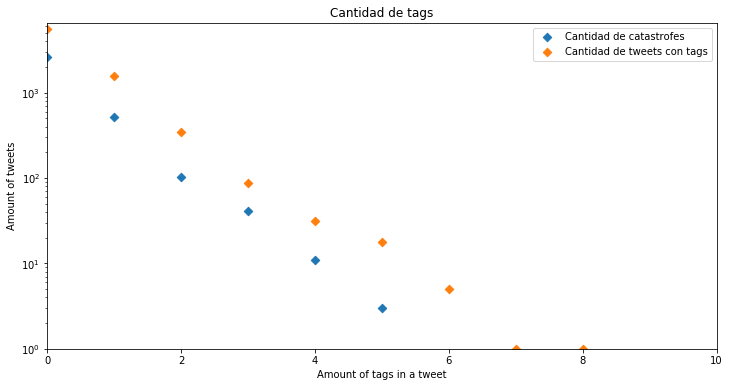

In [119]:

fig,ax = plt.subplots(figsize=(12,6))
tag_count.rename(columns={'sum' : 'Cantidad de catastrofes', 'count':'Cantidad de tweets con tags'}, inplace=True)
for name in ['Cantidad de catastrofes','Cantidad de tweets con tags']:
    ax.scatter(tag_count.Tags, tag_count[name],  marker= 'D' , label=name)
    ax.set_ylim(1,6600)  
    ax.set_xlim(0,10)
    ax.set_yscale("log")
    ax.set_xlabel('Amount of tags in a tweet')
    ax.set_ylabel('Amount of tweets')
    plt.legend()
    plt.title('Cantidad de tags')

In [158]:
df['with_url']= df.text.str.contains("http")

df['with_url']=df['with_url'].astype(int)

In [160]:
url_count = df.groupby(['with_url'])['target'].agg({'sum','count'}).reset_index()
url_count.head()

,with_url,sum,count
0,0,1099,3642
1,1,2172,3971


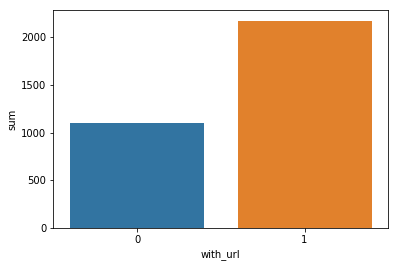

In [163]:
ax= sns.barplot(x="with_url", y="sum", data=url_count)

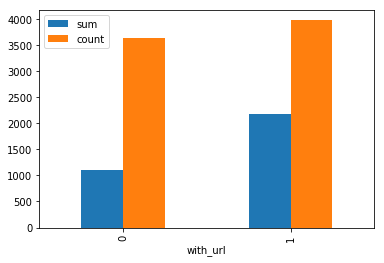

In [168]:
url_count.set_index('with_url').plot(kind='bar',  )